## Simulation of data using Julia


In [1]:
using Distributions

## Simulate matrix of ``genotype" covariates

In [2]:
nRows = 10
nCols = 5
X = rand(Binomial(2,0.5),nRows,nCols)

10×5 Array{Int64,2}:
 1  2  2  1  0
 1  0  1  0  1
 1  0  2  1  2
 1  1  1  1  0
 1  1  1  0  1
 1  1  2  1  1
 2  1  1  1  1
 1  0  2  2  2
 1  0  1  1  2
 1  0  1  2  1

## Add a column of ones for intercept

In [3]:
X = [ones(nRows,1) X]

10×6 Array{Float64,2}:
 1.0  1.0  2.0  2.0  1.0  0.0
 1.0  1.0  0.0  1.0  0.0  1.0
 1.0  1.0  0.0  2.0  1.0  2.0
 1.0  1.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  0.0  1.0
 1.0  1.0  1.0  2.0  1.0  1.0
 1.0  2.0  1.0  1.0  1.0  1.0
 1.0  1.0  0.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  1.0  2.0
 1.0  1.0  0.0  1.0  2.0  1.0

## Simulate effects from normal distribution

In [4]:
size(X)

(10, 6)

In [5]:
nRowsX, nColsX = size(X)
mean = 0.0
std  = 0.5
b = rand(Normal(mean,std),nColsX)

6-element Array{Float64,1}:
  0.10964990935845235
  0.5236255390433162 
  0.7290648566611352 
  0.37271305245383796
 -0.22061048243851505
 -0.45187538518101517

## Simulate phenotypic values

In [6]:
resStd = 1.0
y = X*b + rand(Normal(0,resStd),nRowsX)

10-element Array{Float64,1}:
  2.49884236667311  
  0.138946895977482 
 -0.3150823714474704
  1.0931730586115245
  1.5451859143398776
  0.2975281004003614
  2.138840447783261 
  1.5617740582410373
  1.0959055820700074
  0.7665179556693629

## Function to simulate data


In [7]:
function simDat(nObs,nLoci,bMean,bStd,resStd)
    X = [ones(nObs,1) rand(Binomial(2,0.5),nObs,nLoci)]
    b = rand(Normal(bMean,bStd),size(X,2))
    y = X*b + rand(Normal(0.0, resStd),nObs)
    return (y,X,b)
end

simDat (generic function with 1 method)

## Use of function simDat to simulate data

In [8]:
nObs     = 10
nLoci    = 5
bMean    = 0.0
bStd     = 0.5
resStd   = 1.0
y, X, b = simDat(nLoci,nLoci,bMean,bStd,resStd)

([-0.788982, 1.56687, 0.135734, -1.05863, 3.01918], [1.0 1.0 … 0.0 0.0; 1.0 0.0 … 0.0 1.0; … ; 1.0 0.0 … 1.0 1.0; 1.0 1.0 … 0.0 1.0], [-0.095936, 0.602535, -0.325994, -0.0439205, -0.248649, 0.696151])

In [9]:
y

5-element Array{Float64,1}:
 -0.7889821648787491 
  1.566865124071177  
  0.13573430894983074
 -1.05862972261037   
  3.01917616912065   

In [10]:
X

5×6 Array{Float64,2}:
 1.0  1.0  2.0  0.0  0.0  0.0
 1.0  0.0  1.0  2.0  0.0  1.0
 1.0  0.0  1.0  2.0  0.0  1.0
 1.0  0.0  2.0  0.0  1.0  1.0
 1.0  1.0  1.0  0.0  0.0  1.0

In [11]:
b

6-element Array{Float64,1}:
 -0.09593600125906655 
  0.6025345822939162  
 -0.32599382604870825 
 -0.043920529578046555
 -0.24864858548224344 
  0.6961506409166527  

## XSim: Genome sampler

* Simulate SNPs on chromosomes
* Random mating in finite population to generate LD
* Efficient algorithm for sampling sequence data


## Initialize sampler

In [12]:
using XSim
chrLength = 1.0
numChr    = 1
numLoci   = 2000
mutRate   = 0.0
locusInt  = chrLength/numLoci
mapPos   = collect(0:locusInt:(chrLength-0.0001))
geneFreq = fill(0.5,numLoci)
XSim.build_genome(numChr,chrLength,numLoci,geneFreq,mapPos,mutRate) 

## Simulate random mating in finite population

### Sample Founders

In [13]:
popSizeFounder = 500
sires = sampleFounders(popSizeFounder)
dams  = sampleFounders(popSizeFounder);

Sampling 500 animals into base population.
Sampling 500 animals into base population.


### Random Mating 

In [14]:
ngen,popSize = 20,500
sires1,dams1,gen1 = sampleRan(popSize, ngen, sires, dams);

Generation     2: sampling   250 males and   250 females
Generation     3: sampling   250 males and   250 females
Generation     4: sampling   250 males and   250 females
Generation     5: sampling   250 males and   250 females
Generation     6: sampling   250 males and   250 females
Generation     7: sampling   250 males and   250 females
Generation     8: sampling   250 males and   250 females
Generation     9: sampling   250 males and   250 females
Generation    10: sampling   250 males and   250 females
Generation    11: sampling   250 males and   250 females
Generation    12: sampling   250 males and   250 females
Generation    13: sampling   250 males and   250 females
Generation    14: sampling   250 males and   250 females
Generation    15: sampling   250 males and   250 females
Generation    16: sampling   250 males and   250 females
Generation    17: sampling   250 males and   250 females
Generation    18: sampling   250 males and   250 females
Generation    19: sampling   25

## Get genotypes

In [15]:
animals = concatCohorts(sires1,dams1)
M = getOurGenotypes(animals)

500×2000 Array{Int64,2}:
 2  0  1  1  2  0  2  0  1  1  0  1  1  …  1  1  2  1  1  0  0  0  1  1  2  2
 1  0  1  0  1  1  1  0  1  1  0  2  1     1  0  2  1  1  2  1  0  1  0  2  2
 1  2  1  2  1  0  1  1  0  2  0  2  0     1  2  2  0  1  1  2  1  0  2  1  1
 1  2  1  0  2  0  1  0  1  0  0  0  1     0  1  0  1  0  1  1  1  2  2  1  1
 2  1  1  0  2  1  1  1  0  2  1  1  2     0  2  1  1  0  0  2  1  1  0  0  0
 0  0  0  1  2  1  2  0  0  1  1  2  1  …  1  1  1  1  1  1  2  1  1  0  1  0
 1  2  1  2  2  1  2  2  0  0  1  1  1     2  2  1  1  1  0  1  0  1  1  1  0
 1  1  2  1  2  2  2  1  1  1  1  1  1     2  1  2  2  2  1  1  1  2  1  2  2
 2  0  1  2  1  1  2  2  1  0  1  1  1     0  1  1  1  1  2  1  0  0  1  1  2
 1  1  1  2  0  0  2  2  2  0  1  1  1     2  1  0  1  0  1  1  1  1  1  1  0
 1  0  1  0  0  0  1  1  2  0  2  2  0  …  1  1  2  2  1  2  0  2  0  2  1  1
 2  1  1  1  1  1  1  2  0  0  2  0  1     0  1  1  1  1  1  2  2  0  2  1  1
 0  0  2  1  1  1  0  0  1  2  0  2  0 

## Randomly sample QTL positions 

In [16]:
nQTL   = 50
selQTL = fill(false,numLoci)

2000-element Array{Bool,1}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

In [17]:
#selQTL = rand(numLoci).>0.995  # you want 0.5% to be QTL, i.e. about 100 QTL
selQTL[sample(1:numLoci, nQTL, replace=false)] .= true

50-element view(::Array{Bool,1}, [25, 17, 1491, 1549, 1846, 40, 955, 72, 1020, 642  …  298, 1351, 774, 394, 27, 572, 1832, 249, 1679, 1415]) with eltype Bool:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

In [18]:
#selMrk = selQTL.==false
selMrk =.!selQTL

2000-element BitArray{1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

## QTL and marker matrices

In [19]:
Q = M[:,selQTL]

500×50 Array{Int64,2}:
 1  2  0  1  2  2  1  0  1  2  2  2  1  …  2  1  1  2  0  0  1  1  1  0  2  1
 1  2  1  2  1  1  1  1  1  1  1  0  2     1  1  2  1  0  1  2  1  1  1  0  1
 0  1  1  1  0  2  2  1  1  1  1  1  2     1  1  0  1  0  2  1  2  0  1  0  2
 1  0  1  1  0  2  1  1  1  1  0  1  0     1  0  2  0  1  0  2  1  2  2  2  0
 0  2  0  1  1  0  2  1  0  1  1  0  2     0  1  2  2  2  1  1  0  1  0  0  2
 2  2  0  1  1  0  0  1  2  0  2  2  1  …  0  2  1  1  2  2  2  2  0  1  1  0
 0  1  1  2  1  1  0  2  0  1  2  2  0     0  0  0  2  1  1  1  2  1  1  0  1
 0  0  1  2  2  1  0  1  2  1  1  1  2     1  0  0  0  1  1  1  1  2  1  0  1
 0  0  2  0  1  2  1  1  1  0  1  1  1     1  0  1  1  0  2  2  2  0  0  1  1
 1  1  0  1  2  2  0  0  2  0  1  1  0     1  2  2  1  1  0  1  1  1  2  1  1
 1  0  0  1  2  0  2  1  2  2  0  0  0  …  1  1  1  0  1  1  2  1  0  1  2  1
 1  2  1  0  0  0  2  1  2  1  2  0  2     1  0  2  1  1  0  1  1  1  0  0  2
 2  1  1  0  2  2  2  1  1  0  1  0  1   

In [20]:
X = M[:,selMrk]

500×1950 Array{Int64,2}:
 2  0  1  1  2  0  2  0  1  1  0  1  1  …  1  1  2  1  1  0  0  0  1  1  2  2
 1  0  1  0  1  1  1  0  1  1  0  2  1     1  0  2  1  1  2  1  0  1  0  2  2
 1  2  1  2  1  0  1  1  0  2  0  2  0     1  2  2  0  1  1  2  1  0  2  1  1
 1  2  1  0  2  0  1  0  1  0  0  0  1     0  1  0  1  0  1  1  1  2  2  1  1
 2  1  1  0  2  1  1  1  0  2  1  1  2     0  2  1  1  0  0  2  1  1  0  0  0
 0  0  0  1  2  1  2  0  0  1  1  2  1  …  1  1  1  1  1  1  2  1  1  0  1  0
 1  2  1  2  2  1  2  2  0  0  1  1  1     2  2  1  1  1  0  1  0  1  1  1  0
 1  1  2  1  2  2  2  1  1  1  1  1  1     2  1  2  2  2  1  1  1  2  1  2  2
 2  0  1  2  1  1  2  2  1  0  1  1  1     0  1  1  1  1  2  1  0  0  1  1  2
 1  1  1  2  0  0  2  2  2  0  1  1  1     2  1  0  1  0  1  1  1  1  1  1  0
 1  0  1  0  0  0  1  1  2  0  2  2  0  …  1  1  2  2  1  2  0  2  0  2  1  1
 2  1  1  1  1  1  1  2  0  0  2  0  1     0  1  1  1  1  1  2  2  0  2  1  1
 0  0  2  1  1  1  0  0  1  2  0  2  0 

## Simulation of breeding values and phenotypic values

In [21]:
nQTL = size(Q,2)
nObs = size(Q,1)
α = rand(Normal(0,1),nQTL)
a = Q*α
# scaling breeding values to have variance 25.0
v = var(a)
genVar = 25.0
a *= sqrt(genVar/v)
va = var(a)
# formatted printing
println("genetic variance = $va")

genetic variance = 25.0


In [22]:
using Statistics

In [23]:
resVar = 75.0
resStd = sqrt(resVar)
e = rand(Normal(0,resStd),nObs)
y = 100 .+ a + e
yMean = Statistics.mean(y)
yVar = Statistics.var(y)
println("phenotypic mean     = $yMean")
println("phenotypic variance = $yVar")

phenotypic mean     = 106.69412008351428
phenotypic variance = 103.34351515375239


## Simulate Crossbreeding using XSim

In [24]:
ngen,popSize = 20,500
siresA,damsA,gen1   = sampleRan(popSize, ngen, sires,  dams)
siresB,damsB,gen1   = sampleRan(popSize, ngen, sires,  dams)
siresAB,damsAB,gen1 = sampleRan(popSize, ngen, siresA, damsB,gen=gen1);

Generation     2: sampling   250 males and   250 females
Generation     3: sampling   250 males and   250 females
Generation     4: sampling   250 males and   250 females
Generation     5: sampling   250 males and   250 females
Generation     6: sampling   250 males and   250 females
Generation     7: sampling   250 males and   250 females
Generation     8: sampling   250 males and   250 females
Generation     9: sampling   250 males and   250 females
Generation    10: sampling   250 males and   250 females
Generation    11: sampling   250 males and   250 females
Generation    12: sampling   250 males and   250 females
Generation    13: sampling   250 males and   250 females
Generation    14: sampling   250 males and   250 females
Generation    15: sampling   250 males and   250 females
Generation    16: sampling   250 males and   250 females
Generation    17: sampling   250 males and   250 females
Generation    18: sampling   250 males and   250 females
Generation    19: sampling   25

## Calculate and plot gene frequencies 

In [25]:
freq=Statistics.mean(M,dims=1)/2

1×2000 Array{Float64,2}:
 0.484  0.474  0.509  0.516  0.502  …  0.477  0.407  0.584  0.522  0.589

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /opt/julia/packages/Gadfly/ew1SM/src/mapping.jl:228


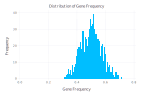

In [26]:
using Gadfly
plot(x=freq,Geom.histogram,
Guide.title("Distribution of Gene Frequency"),
Guide.ylabel("Frequency"),
Guide.xlabel("Gene Frequency"))

In [27]:
size(M)

(500, 2000)

In [28]:
M = float(M)

500×2000 Array{Float64,2}:
 2.0  0.0  1.0  1.0  2.0  0.0  2.0  0.0  …  0.0  0.0  0.0  1.0  1.0  2.0  2.0
 1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0     2.0  1.0  0.0  1.0  0.0  2.0  2.0
 1.0  2.0  1.0  2.0  1.0  0.0  1.0  1.0     1.0  2.0  1.0  0.0  2.0  1.0  1.0
 1.0  2.0  1.0  0.0  2.0  0.0  1.0  0.0     1.0  1.0  1.0  2.0  2.0  1.0  1.0
 2.0  1.0  1.0  0.0  2.0  1.0  1.0  1.0     0.0  2.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  2.0  1.0  2.0  0.0  …  1.0  2.0  1.0  1.0  0.0  1.0  0.0
 1.0  2.0  1.0  2.0  2.0  1.0  2.0  2.0     0.0  1.0  0.0  1.0  1.0  1.0  0.0
 1.0  1.0  2.0  1.0  2.0  2.0  2.0  1.0     1.0  1.0  1.0  2.0  1.0  2.0  2.0
 2.0  0.0  1.0  2.0  1.0  1.0  2.0  2.0     2.0  1.0  0.0  0.0  1.0  1.0  2.0
 1.0  1.0  1.0  2.0  0.0  0.0  2.0  2.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  …  2.0  0.0  2.0  0.0  2.0  1.0  1.0
 2.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0     1.0  2.0  2.0  0.0  2.0  1.0  1.0
 0.0  0.0  2.0  1.0  1.0  1.0  0.0  0

In [29]:
corMat = cor(M)

2000×2000 Array{Float64,2}:
  1.0          0.0836583    -0.114822    …  -0.0127624   -0.00462299
  0.0836583    1.0           0.0710874      -0.0151938    0.00256458
 -0.114822     0.0710874     1.0             0.0143698    0.0594967 
 -0.00973852   0.0550952    -0.0213135       0.0596929   -0.0236525 
  0.147115     0.0515385    -0.0837192      -0.05814      0.046502  
  0.0126144    0.107825     -0.0808088   …   0.0797314    0.0824128 
  0.080726    -0.13486      -0.0845709      -0.00795729  -0.0741081 
  0.0407776    0.0633015    -0.0424242       0.0209753   -0.022611  
 -0.159552    -0.130213      0.0410737      -0.0126001   -0.00367276
  0.0484992   -0.0295314    -0.0759344      -0.0550924    0.00184848
 -0.11865     -0.0518459    -0.0896487   …  -0.0302972    0.0112672 
  0.167514     0.152929      0.00969266      0.0621114   -0.00320852
  0.098787    -0.029541      0.0899496      -0.116427     0.0234382 
  ⋮                                      ⋱                          
 -0.00

In [30]:
LDMat = zeros(1800,200)
for i = 1:1800
    LDMat[i,:] = corMat[i,(i+1):(i+200)].^2
end

In [31]:
y = Statistics.mean(LDMat,dims=1)

1×200 Array{Float64,2}:
 0.0219616  0.0218181  0.0202089  …  0.00698347  0.00654538  0.00610345

In [32]:
using Gadfly

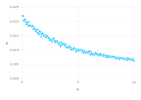

In [33]:
plot(x=(1:200)/200*10,y=y)

In [34]:
ngen = 100
sires2,dams2,gen1 = sampleRan(popSize, ngen, sires1, dams1,gen=gen1);

Generation    42: sampling   250 males and   250 females
Generation    43: sampling   250 males and   250 females
Generation    44: sampling   250 males and   250 females
Generation    45: sampling   250 males and   250 females
Generation    46: sampling   250 males and   250 females
Generation    47: sampling   250 males and   250 females
Generation    48: sampling   250 males and   250 females
Generation    49: sampling   250 males and   250 females
Generation    50: sampling   250 males and   250 females
Generation    51: sampling   250 males and   250 females
Generation    52: sampling   250 males and   250 females
Generation    53: sampling   250 males and   250 females
Generation    54: sampling   250 males and   250 females
Generation    55: sampling   250 males and   250 females
Generation    56: sampling   250 males and   250 females
Generation    57: sampling   250 males and   250 females
Generation    58: sampling   250 males and   250 females
Generation    59: sampling   25

In [35]:
animals2 = concatCohorts(sires2,dams2)
M = getOurGenotypes(animals2)
varM = Statistics.var(M,dims=1)

1×2000 Array{Float64,2}:
 0.486156  0.462589  0.485226  0.389996  …  0.485996  0.525451  0.555747

In [36]:
Mark = M[:,vec(varM .> 0)];

In [37]:
corMat = cor(Mark)
nRows  = size(corMat,1)
LDMat  = zeros(nRows-200,200);

In [38]:
for i = 1:(nRows-200)
    LDMat[i,:] = corMat[i,(i+1):(i+200)].^2
end

In [39]:
y = Statistics.mean(LDMat,dims=1)

1×200 Array{Float64,2}:
 0.105785  0.100519  0.094961  …  0.00617525  0.00641688  0.00668401

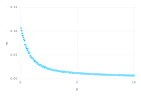

In [40]:
plot(x=(1:200)/200*10,y=y)

In [41]:
;ipython nbconvert --to slides dataSimulation.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook dataSimulation.ipynb to slides
[NbConvertApp] Writing 302876 bytes to dataSimulation.slides.html
